<a href="https://colab.research.google.com/github/NTKhoii/DS102.P21_Lab_1/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
file_path = '/content/drive/MyDrive/DS102.P21/forestfires.csv'
df = pd.read_csv(file_path)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.dtypes

,0
X,int64
Y,int64
month,object
day,object
FFMC,float64
DMC,float64
DC,float64
ISI,float64
temp,float64
RH,int64


In [ ]:
print(df['month'].unique())
print(df['day'].unique())

['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']


In [ ]:
def convert_month(month: str) -> int:
  dict_month = {
      'jan':1,
      'feb':2,
      'mar':3,
      'apr':4,
      'may':5,
      'jun':6,
      'jul':7,
      'aug':8,
      'sep':9,
      'oct':10,
      'nov':11,
      'dec':12
  }
  return dict_month[month]

In [ ]:
def convert_day(day: str) -> int:
  dict_day = {
      'mon':1,
      'tue':2,
      'wed':3,
      'thu':4,
      'fri':5,
      'sat':6,
      'sun':0
  }
  return dict_day[day]

In [ ]:
df['month'] = df['month'].apply(convert_month)
df['day'] = df['day'].apply(convert_day)

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


In [ ]:
df.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,3.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
Matrix = df.to_numpy()
Matrix

array([[ 7.  ,  5.  ,  3.  , ...,  6.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  0.9 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 7.  ,  4.  ,  8.  , ...,  6.7 ,  0.  , 11.16],
       [ 1.  ,  4.  ,  8.  , ...,  4.  ,  0.  ,  0.  ],
       [ 6.  ,  3.  , 11.  , ...,  4.5 ,  0.  ,  0.  ]])

In [ ]:
X = Matrix[:, :-1]
y = Matrix[:,-1]

In [ ]:
X.shape, y.shape

((517, 12), (517,))

In [ ]:
X

array([[ 7. ,  5. ,  3. , ..., 51. ,  6.7,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  0.9,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  1.3,  0. ],
       ...,
       [ 7. ,  4. ,  8. , ..., 70. ,  6.7,  0. ],
       [ 1. ,  4. ,  8. , ..., 42. ,  4. ,  0. ],
       [ 6. ,  3. , 11. , ..., 31. ,  4.5,  0. ]])

In [ ]:
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((413, 12), (413,), (104, 12), (104,))

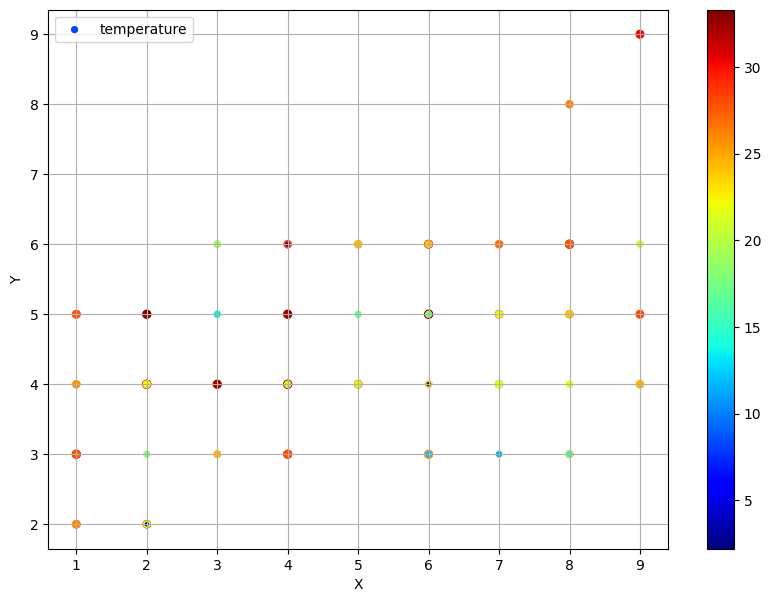

In [ ]:
import matplotlib.pyplot as plt
df.plot(kind="scatter", x="X", y="Y", grid=True,
             s=df["temp"], label="temperature",
             c=df['temp'], cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

array([[<Axes: xlabel='FFMC', ylabel='FFMC'>,
        <Axes: xlabel='DMC', ylabel='FFMC'>,
        <Axes: xlabel='DC', ylabel='FFMC'>,
        <Axes: xlabel='ISI', ylabel='FFMC'>,
        <Axes: xlabel='temp', ylabel='FFMC'>,
        <Axes: xlabel='month', ylabel='FFMC'>,
        <Axes: xlabel='area', ylabel='FFMC'>],
       [<Axes: xlabel='FFMC', ylabel='DMC'>,
        <Axes: xlabel='DMC', ylabel='DMC'>,
        <Axes: xlabel='DC', ylabel='DMC'>,
        <Axes: xlabel='ISI', ylabel='DMC'>,
        <Axes: xlabel='temp', ylabel='DMC'>,
        <Axes: xlabel='month', ylabel='DMC'>,
        <Axes: xlabel='area', ylabel='DMC'>],
       [<Axes: xlabel='FFMC', ylabel='DC'>,
        <Axes: xlabel='DMC', ylabel='DC'>,
        <Axes: xlabel='DC', ylabel='DC'>,
        <Axes: xlabel='ISI', ylabel='DC'>,
        <Axes: xlabel='temp', ylabel='DC'>,
        <Axes: xlabel='month', ylabel='DC'>,
        <Axes: xlabel='area', ylabel='DC'>],
       [<Axes: xlabel='FFMC', ylabel='ISI'>,
        <Axes: x

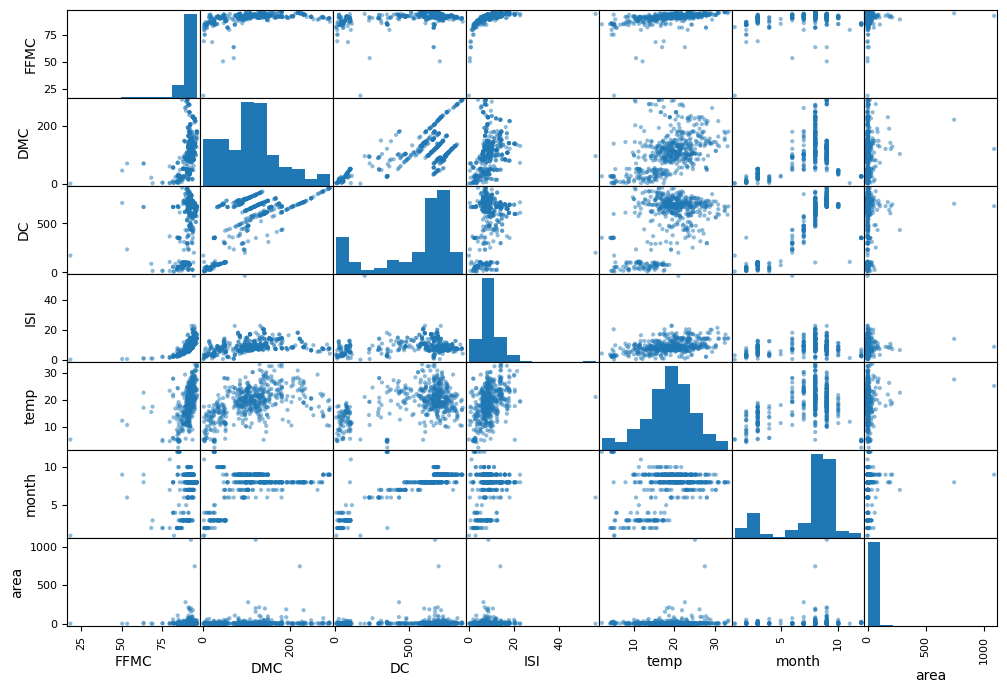

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['FFMC', 'DMC', 'DC', 'ISI', 'temp','month', 'area']
scatter_matrix(df[attributes], figsize=(12,8))

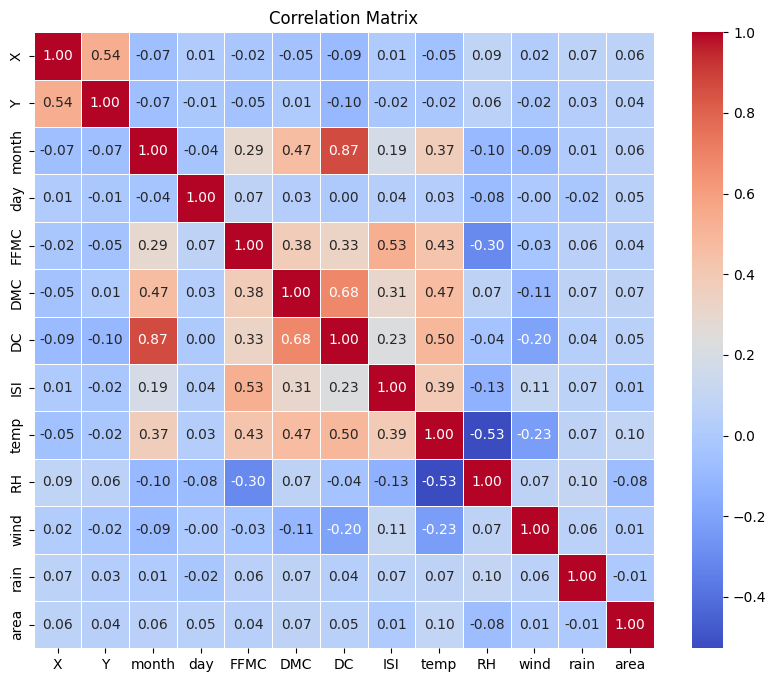

In [ ]:
import seaborn as sns
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Phân tích ma trận tương quan:
1. FFMC và ISI có độ tương quan 0.53 phản ánh độ ẩm của các vật liệu ảnh hưởng đến tốc độ lan truyền của lửa.
2. DC và DMC có độ tương quan 0.68 phản ánh độ ẩm và mức độ khô hạn của đất có mối tương quan với nhau
3. Dữ liệu đầu ra (area) cho ta thấy dữ liệu bị skew qua phần trái của biểu đồ -> cho thấy có quá nhiều đám cháy nhỏ nhưng có vài đám cháy rất lớn -> cần khắc phục

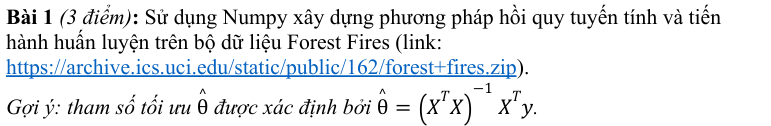

In [ ]:
class LinearRegression:
  # def __init__(self):
  #   self.coefficients = None #Lưu hệ số của các biến độc lập X

  def fit(self, X_train, y_train):

    self.coefficients = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

  def predict(self, X_test):
    return X_test @ self.coefficients

  def rmse(self, y_true, y_pred):
    # return np.sqrt(np.mean((y_true - y_pred)**2))
    return np.square (y_true - y_pred).mean()**0.5

In [ ]:
X_train

array([[ 7. ,  5. ,  3. , ..., 51. ,  6.7,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  0.9,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  1.3,  0. ],
       ...,
       [ 6. ,  3. ,  2. , ..., 42. ,  2.7,  0. ],
       [ 7. ,  4. ,  2. , ..., 53. ,  9.4,  0. ],
       [ 9. ,  4. ,  7. , ..., 27. ,  4.5,  0. ]])

In [ ]:
model_0 = LinearRegression()
model_0

In [ ]:
model_0.fit(X_train=X_train, y_train=y_train)

In [ ]:
print(model_0.coefficients)

[ 0.93387474 -0.3472708   2.97274599  1.69617548 -0.08518378  0.11686352
 -0.02830015 -0.88678297  0.43970684 -0.18297875  0.04626583 -6.54744483]


In [ ]:
y_preds = model_0.predict(X_test)

In [ ]:
print(model_0.rmse(y_true=y_test, y_pred=y_preds))

79.4247726396297


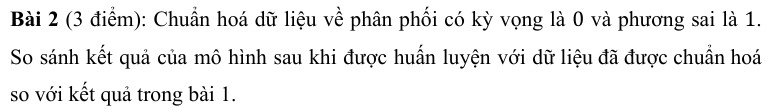

- Tiến hành chuẩn hoá các feature `FFMC, DMC, DC, ISI, temp, wind, RH, area`

In [ ]:
def normalize_data(df, columns):
    df_normalized = df.copy()
    for column in columns:
        mean = np.mean(df[column])
        std = np.std(df[column])
        if std != 0:
            df_normalized[column] = (df[column] - mean) / std
        else:
            df_normalized[column] = df[column]
    return df_normalized

In [ ]:
columns = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'wind', 'area']
normalized_df = normalize_data(df, columns=columns)

In [ ]:
normalized_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,51,1.498614,0.0,-0.202020
1,7,4,10,2,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,33,-1.741756,0.0,-0.202020
2,7,4,10,6,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,33,-1.518282,0.0,-0.202020
3,8,6,3,5,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,97,-0.009834,0.2,-0.202020
4,8,6,3,0,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,99,-1.238940,0.0,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,0,-1.640083,-0.846648,0.474768,-1.563460,1.536084,32,-0.736124,0.0,-0.100753
513,2,4,8,0,-1.640083,-0.846648,0.474768,-1.563460,0.519019,71,0.995798,0.0,0.651674
514,7,4,8,0,-1.640083,-0.846648,0.474768,-1.563460,0.398350,70,1.498614,0.0,-0.026532
515,1,4,8,6,0.680957,0.549003,0.269382,0.500176,1.156839,42,-0.009834,0.0,-0.202020


In [ ]:
normalized_Matrix = normalized_df.to_numpy()
X = normalized_Matrix[:,:-1]
y = normalized_Matrix[:,-1]
print(X.shape, y.shape)

(517, 12) (517,)


In [ ]:
#split data into training and test set
split_size = int(0.8*X.shape[0])
X_train, X_test = X[:split_size], X[split_size:]
y_train, y_test = y[:split_size], y[split_size:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(413, 12) (413,) (104, 12) (104,)


In [ ]:
model_1  = LinearRegression()
model_1

In [ ]:
model_1.fit(X_train, y_train)

In [ ]:
y_preds = model_1.predict(X_test)

In [ ]:
print(model_1.rmse(y_true=y_test, y_pred=y_preds))

1.2505026043938334


#### Nhận xét việc chuẩn hoá dữ liệu và so sánh với kết quả bài 1:
1. Việc chuẩn hoá các giá trị có phạm giá trị quá lớn và dữ liệu bị skew đã cho thấy sự tiến bộ của mô hình, giảm ảnh hưởng của các giá trị outliers.
2. Khi chuẩn hóa các feature như FFMC, DMC, DC, ISI, temp, area ta giúp mô hình học tốt hơn, tránh hiện tượng một số feature chi phối quá mức.
3. Kết quả sau chuẩn hóa cho thấy mô hình có độ hội tụ nhanh hơn, hệ số hồi quy dễ diễn giải hơn.
- ==> So với bài 1 (trước khi chuẩn hóa), sai số dự đoán đã giảm, chứng tỏ việc chuẩn hóa giúp mô hình hoạt động hiệu quả hơn trên dữ liệu có phân phối lệch.

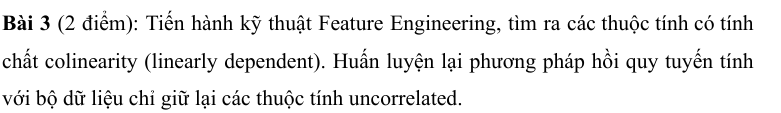

In [ ]:
correlation_matrix = normalized_df.corr()

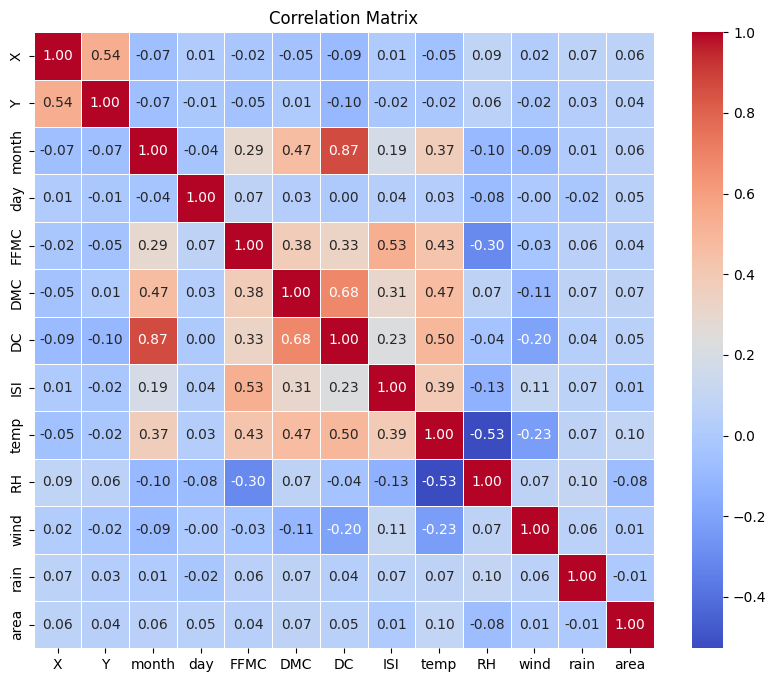

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
high_correlation = correlation_matrix[abs(correlation_matrix) > 0.6]
high_correlation

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,1.000000,NaN,NaN,NaN,0.868698,NaN,NaN,NaN,NaN,NaN,NaN
day,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FFMC,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DMC,NaN,NaN,NaN,NaN,NaN,1.000000,0.682192,NaN,NaN,NaN,NaN,NaN,NaN
DC,NaN,NaN,0.868698,NaN,NaN,0.682192,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
ISI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
RH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [ ]:
# Độ tương quan của DC và DMC là 0.68 -> bỏ thuôc tính DMC, giữ lại DC
normalized_df = normalized_df.drop(['DMC'], axis=1)
normalized_df.shape

(517, 12)

In [ ]:
normalized_Matrix = normalized_df.to_numpy()
X = normalized_Matrix[:,:-1]
y = normalized_Matrix[:,-1]
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((413, 11), (413,), (104, 11), (104,))

In [ ]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

In [ ]:
y_preds = model_2.predict(X_test)

In [ ]:
print(model_1.rmse(y_true=y_test, y_pred=y_preds))

1.2505725284796345


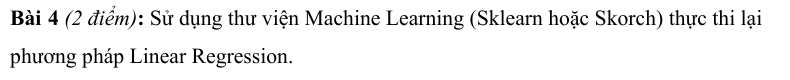

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('area', axis=1)
y = df['area']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((413, 12), (413,), (104, 12), (104,))

In [ ]:
# normalize data
columns = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[columns] = scaler.fit_transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

In [ ]:
# Reshape y_train and y_test into 2D arrays for StandardScaler
y_train_2d = y_train.values.reshape(-1, 1)
y_test_2d = y_test.values.reshape(-1, 1)

y_train_scaled = scaler.fit_transform(y_train_2d)
y_test_scaled = scaler.transform(y_test_2d)

y_train = pd.Series(y_train_scaled.flatten(), index=y_train.index)
y_test = pd.Series(y_test_scaled.flatten(), index=y_test.index)

In [ ]:
model_3 = LinearRegression()
model_3.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_preds = model_3.predict(X_test)

In [ ]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_test, y_preds)
rmse

2.3746048340391757

## Đánh giá và so sánh kết quả khi sử dụng sklearn và không sử dụng
- Dựa vào kết quả trên, ta thấy rsme lúc sử dụng sklearn lớn hơn lúc không dùng. Điều này bị gây ra bởi quá trình chuẩn hoá khác nhau.
- Khi không dùng sklear, hàm normalize_data() tính mean và std trên toàn bộ dữ liệu, điều này có thể gây ra data leakage. Trong khi đó, hàm StandardScaler() tính mean và std trên tập train, sau đó áp dụng cho tập test.
=> Do đó rsme trên test nhỏ hơn nhưng không phản ánh đúng khả năng tổng quát hoá của mô hình

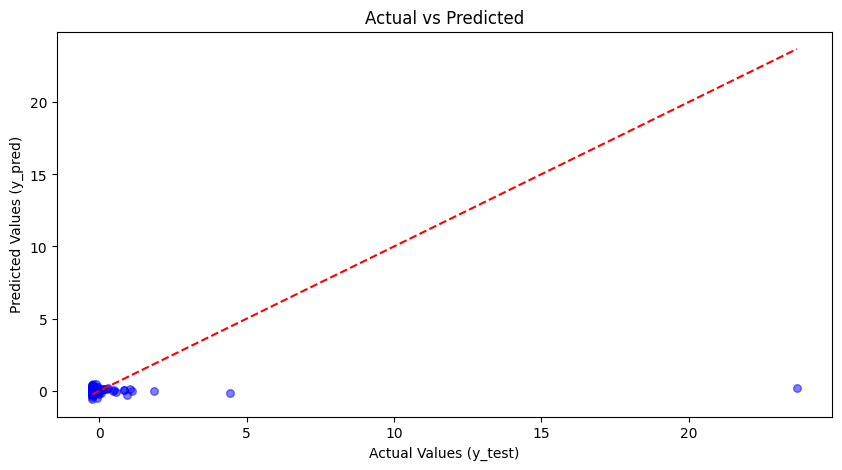

In [ ]:
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, c='b',s=30, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle='--')
    plt.xlabel("Actual Values (y_test)")
    plt.ylabel("Predicted Values (y_pred)")
    plt.title("Actual vs Predicted")
    plt.show()

# Gọi hàm với dữ liệu dự đoán
plot_predictions(y_test, y_preds)